In [6]:
#https://medium.com/analytics-vidhya/build-your-own-technical-analysis-stock-screener-using-python-5d1bb3d091f0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filepath = 'C:/Users/Wai/OneDrive/Desktop/Stocks-Demo/'
pd.set_option("display.precision",4)
#df = pd.read_csv("stocks_rets.csv")
df = pd.read_csv(filepath + 'klse_stocks_v5.csv')#.set_index('Date')
df2 = pd.read_csv(filepath + 'klse.csv')
df3 = pd.read_csv(filepath + 'klse_stocks_ret_v5.csv')
%matplotlib inline

In [7]:
df.tail(5)

Date      ^KLSE  1015.KL  1023.KL  1066.KL  1082.KL  1155.KL  \
624  2022-09-19  1451.5200     4.05     5.42     5.64     18.9     8.63   
625  2022-09-20  1461.1000     4.06     5.48     5.67     18.9     8.70   
626  2022-09-21  1447.1801     4.02     5.45     5.66     18.9     8.73   
627  2022-09-22  1439.1600     4.03     5.38     5.64     18.9     8.71   
628  2022-09-23  1424.9800     3.97     5.39     5.67     18.7     8.69   

     1295.KL  1619.KL  1818.KL  ...  6947.KL  7084.KL  7106.KL  7113.KL  \
624     4.45     1.55     6.26  ...     3.45     5.06    0.710    0.705   
625     4.45     1.54     6.39  ...     3.49     5.05    0.695    0.705   
626     4.40     1.42     6.31  ...     3.48     4.99    0.680    0.645   
627     4.39     1.41     6.28  ...     3.43     5.04    0.675    0.630   
628     4.34     1.40     6.27  ...     3.38     5.02    0.670    0.650   

     7153.KL  7277.KL  7293.KL  8583.KL  8664.KL  9059.KL  
624     0.99     2.24     2.27    0.565    0.680    0.985  
625     1.01     2.25     2.24    0.565    0.670    0.990  
626     1.00     2.16     2.26    0.550    0.665    0.995  
627     0.99     2.18     2.30    0.545    0.665    0.980  
628     1.01     2.15     2.26    0.545    0.655    0.980  

[5 rows x 65 columns]

In [8]:
df = df.set_index('Date')

In [86]:
# df1 = df.iloc[:,[139, 137, 124, 143, 0]]
# df1.head()

In [13]:
df1 = df[['5209.KL', '5225.KL', '5222.KL', '5031.KL', '1023.KL', '^KLSE']]
df1.tail()

5209.KL  5225.KL  5222.KL  5031.KL  1023.KL      ^KLSE
Date                                                              
2022-09-19     3.50     6.16     1.45     4.55     5.42  1451.5200
2022-09-20     3.48     6.14     1.47     4.64     5.48  1461.1000
2022-09-21     3.43     6.10     1.46     4.61     5.45  1447.1801
2022-09-22     3.43     6.00     1.46     4.64     5.38  1439.1600
2022-09-23     3.41     5.80     1.46     4.66     5.39  1424.9800

In [14]:
# df1 = df1.set_index('Date')
# df1.head()
df1.to_csv(filepath + 'test2.csv')

In [15]:
stocks = []
for i in df1.columns:
    #x = df1.columns[i]
    for j in range(df2.shape[0]):
        if i == df2.code1.iloc[j]:
            print(df2.name.iloc[j])
            stocks.append(df2.name.iloc[j])
            break

GAS MALAYSIA BERHAD
IHH HEALTHCARE BERHAD
FGV HOLDINGS BERHAD
TIME DOTCOM BERHAD
CIMB GROUP HOLDINGS BERHAD


In [8]:
df1.pct_change().var()

5222.KL    7.1060e-04
4197.KL    2.9293e-04
1023.KL    3.6444e-04
5209.KL    1.0214e-04
5031.KL    1.8500e-04
^KLSE      8.9287e-05
dtype: float64

In [12]:
#stocks_list = ['HWM', 'AKAM', 'ABT', 'SPDN']
#w = [0.1728, 0.2621,0.3253,0.2396]
w = [0.1225, 0.1251, 0.1482, 0.2338, 0.1269, 0.2432]
sum(w)

0.9996999999999999

In [10]:
k = 0
windows = 10#20
window_size = df1.shape[0]
windows_forward = window_size - windows

import numpy as np
p = []
for j in range(windows_forward):
    
    prices1 = df1.iloc[k:windows,].mean()
    port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
    k = k+1
    windows = windows + 1
    p.append(port_price)
    

In [11]:
window_size = df1.shape[0]

pp = pd.DataFrame()
pp = pd.DataFrame()
win = [10,20,30,40]
for i in win:
    p = []
    k = 0
    windows = i
    windows_forward = window_size - i
    
    for j in range(windows_forward):
    
        prices1 = df1.iloc[k:windows,].mean()
        port_price = np.dot(w,prices1)
    #print('Mean Price: ', port_price)
    #print(prices1)
        k = k+1
        windows = windows + 1
        p.append(port_price)
    p1 = pd.DataFrame(p)
    pp = pd.concat([pp,p1],axis =1)

<AxesSubplot:>

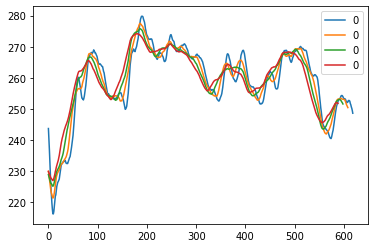

In [12]:
pp.plot()

In [13]:
# print(pp.iloc[:,0].mean()/pp.iloc[:,0].std())
# print(pp.iloc[:,1].mean()/pp.iloc[:,1].std())
# print(pp.iloc[:,2].mean()/pp.iloc[:,2].std())
# print(pp.iloc[:,3].mean()/pp.iloc[:,3].std())
# print(pp.iloc[:,4].mean()/pp.iloc[:,4].std())

In [14]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# # plt.xlim(0,140)
# # plt.ylim(80,115)
# # pp.plot(figsize=(15,15),subplots=True,grid=True)

# pp.plot(figsize=(15,15),subplots=True,xlim=(0,360),ylim=(4,7),grid=True)


<AxesSubplot:>

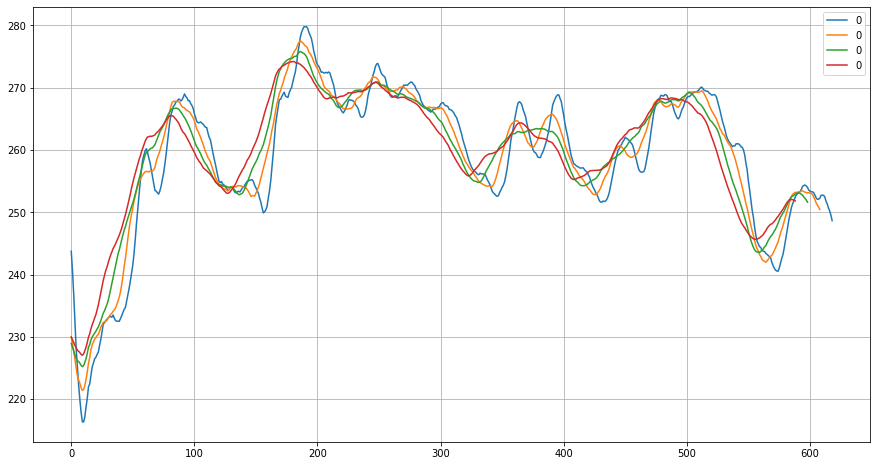

In [15]:
prices = pd.DataFrame(pp)
prices.plot(figsize=(15,8),grid=True)

['FGV HOLDINGS BERHAD', 'SIME DARBY BERHAD', 'CIMB GROUP HOLDINGS BERHAD', 'GAS MALAYSIA BERHAD', 'TIME DOTCOM BERHAD']


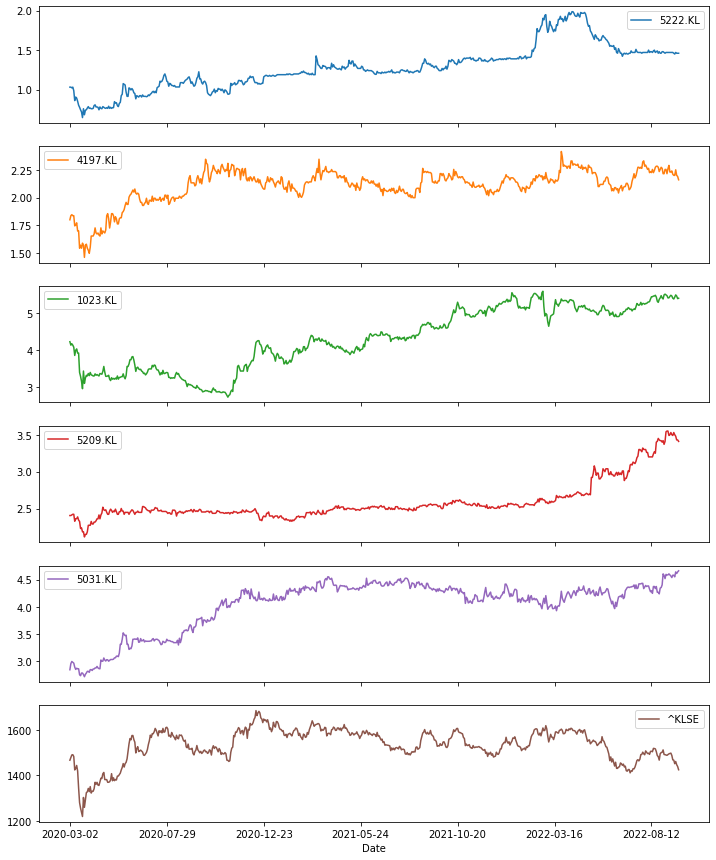

In [16]:
df1.plot(figsize=(12,15),subplots=True)
print(stocks)

In [17]:
l = df1.shape[1]
l

6

In [18]:
for i in df1.columns:
    df1['{}_avg'.format(i)] = df1[i].rolling(window=15).mean()

<ipython-input-18-5600f3f22310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['{}_avg'.format(i)] = df1[i].rolling(window=15).mean()


In [19]:
df1.head()

5222.KL  4197.KL  1023.KL  5209.KL  5031.KL      ^KLSE  \
Date                                                                 
2020-03-02   1.0309   1.7990   4.2262   2.4066   2.8454  1466.9399   
2020-03-03   1.0309   1.8357   4.1343   2.4066   2.9576  1478.6400   
2020-03-04   1.0219   1.8449   4.1711   2.4152   2.9969  1489.9500   
2020-03-05   1.0309   1.8357   4.1343   2.4238   2.9818  1491.0300   
2020-03-06   0.9861   1.8357   4.0792   2.4238   2.9666  1483.1000   

            5222.KL_avg  4197.KL_avg  1023.KL_avg  5209.KL_avg  5031.KL_avg  \
Date                                                                          
2020-03-02          NaN          NaN          NaN          NaN          NaN   
2020-03-03          NaN          NaN          NaN          NaN          NaN   
2020-03-04          NaN          NaN          NaN          NaN          NaN   
2020-03-05          NaN          NaN          NaN          NaN          NaN   
2020-03-06          NaN          NaN          NaN          NaN          NaN   

            ^KLSE_avg  
Date                   
2020-03-02        NaN  
2020-03-03        NaN  
2020-03-04        NaN  
2020-03-05        NaN  
2020-03-06        NaN

In [20]:
df1 = df1.dropna()

In [21]:
df1['raw'] = df1.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)

<ipython-input-21-b2f1ee006aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['raw'] = df1.iloc[:,:l].apply(lambda x: np.sum(x * w),axis=1)


In [22]:
# a = df['^KLSE'].values
# b = df1.raw.values
# np.corrcoef(a,b)[0, 1]

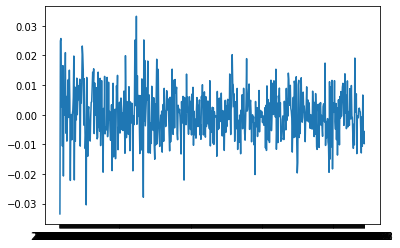

In [23]:
#plt.plot(df['^KLSE'])
plt.plot(df1.raw.pct_change())

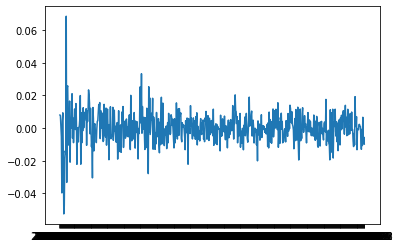

In [24]:
plt.plot(df['^KLSE'].pct_change())

In [25]:
rows = df1.shape[0]
np.corrcoef(df['^KLSE'].iloc[-rows:].values,df1.raw.iloc[-rows:].values)[0, 1]

0.9997194753619559

In [26]:
corre = []
for i in range(rows-5):
    j = i+5
    cor = np.corrcoef(df['^KLSE'].iloc[-j:].values,df1.raw.iloc[-j:].values)[0, 1]
    cor = abs(cor)
    corre.append(cor)

In [27]:
sum(corre)

609.9108921742102

In [28]:
import statistics
prob = statistics.mean(corre)

In [29]:
df['^KLSE'].pct_change().std() , df1.raw.pct_change().std()

(0.009449158867704763, 0.008378484347681047)

In [30]:
klse_std = df['^KLSE'].pct_change().std()
stock_std = df1.raw.pct_change().std()
H = statistics.mean(corre) * (stock_std/klse_std)
H

0.8865614970979301

In [31]:
(H*1000000)/80000

11.082018713724125

In [32]:
4200/80000

0.0525

In [33]:
(H*30000)/80000

0.3324605614117238

In [34]:
((df['^KLSE'].shift() - df['^KLSE']) *50).std()

698.7129883734635

### HEDGE 

In [35]:
# 1 : 1 Hedge
(((df['^KLSE'].shift() - df['^KLSE']) *50).std()) /((df1.raw.pct_change() * 83000).std())

1.0047436297847654

In [56]:
potion=4200/16.7
potion

251.49700598802397

In [57]:
x1 = [x *potion*100 for x in w]
x1

[4308.143712574851,
 2590.4191616766466,
 4099.4011976047905,
 4959.520958083832,
 4984.670658682635,
 4200.000000000001]

In [36]:
# Hedge of portfolio percentage of KLSE
#16.7 = 4200
cap = (100-16.7) *(4200/16.7)
cap

20949.700598802396

In [38]:
df1.iloc[-1,:l]

5222.KL       1.46
4197.KL       2.16
1023.KL       5.39
5209.KL       3.41
5031.KL       4.66
^KLSE      1424.98
Name: 2022-09-23, dtype: float64

### Buy 100 = 1 lot

In [58]:
x1/df1.iloc[-1,:l]

5222.KL    2950.7833
4197.KL    1199.2681
1023.KL     760.5568
5209.KL    1454.4049
5031.KL    1069.6719
^KLSE         2.9474
Name: 2022-09-23, dtype: float64

### Full 1 to 1 Hedge

In [93]:
(1425*50) / (w[-1]*100)

4266.4670658682635

In [70]:
cap = 83000
w1 = [val * cap for val in w[:-1]]
print(w1)
print(sum(w1))

[14217.900000000001, 8549.0, 13529.0, 16367.599999999999, 16450.6, 13861.0]
82975.1


In [103]:
# Total capital = index * 50
idx = 1425 *50
x1 = [x *idx for x in w]
print(x1)
print(sum(x1[:-1]))

[12205.125, 7338.75, 11613.75, 14050.499999999998, 14121.75, 11898.75]
59329.875


In [104]:
x1[:-1]

[12205.125, 7338.75, 11613.75, 14050.499999999998, 14121.75]

In [101]:
# w1 = [val * 1.167 for val in w[:-1]]
# print(w1)
# print(sum(w1))

In [102]:
x1/df1.iloc[-1,:l]

5222.KL    8359.6744
4197.KL    3397.5693
1023.KL    2154.6847
5209.KL    4120.3811
5031.KL    3030.4186
^KLSE         8.3501
Name: 2022-09-23, dtype: float64

Slope:  4.319224758862109e-07


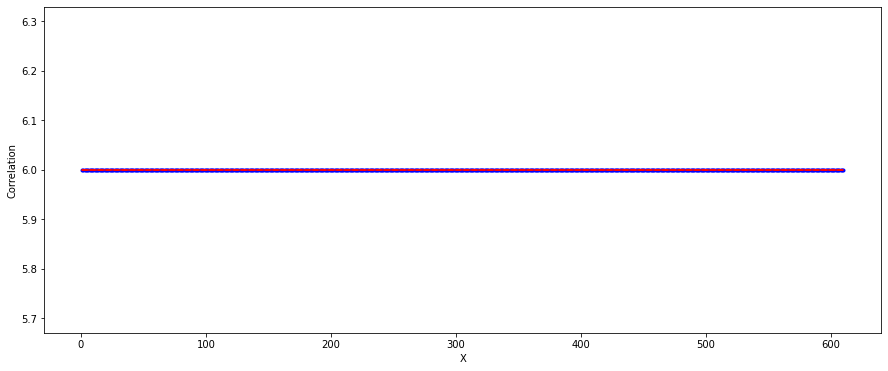

In [108]:
from scipy import stats

def norm0_1(x):
    return (x - x.min())/ (x.max()-x.min())

def denorm(x_norm, x):
    return (x_norm * (x.max() - x.min()) + x.min())

X = np.arange(1,rows-4,1)
cor2 = stats.theilslopes(list(reversed(corre)), X, 0.90)[0]
print('Slope: ',cor2)
lis = list(reversed(corre))
#x = pd.DataFrame(np.arange(1,len(corre)+1))

df4 = pd.DataFrame({'X':np.arange(1,len(corre)+1),'cor':l})
x = df4['X'].astype(float)
x_norm = 2*norm0_1(x)-1
y = df4.cor
res = stats.theilslopes(y, x_norm, 0.90)


fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(111)

ax.plot(x, y, 'b.')
ax.plot(x, res[1] + res[0] * x_norm, 'r-')
ax.plot(x, res[1] + res[2] * x_norm, 'r--')
ax.plot(x, res[1] + res[3] * x_norm, 'r--')
plt.ylabel('Correlation')
plt.xlabel('X')

plt.show()

In [109]:
l

6

In [110]:
ll = l+l
ll

12

In [111]:
df1['avg'] = df1.iloc[:,l:ll].apply(lambda x: np.sum(x * w),axis=1)
df1.head()

5222.KL  4197.KL  1023.KL  5209.KL  5031.KL    ^KLSE  5222.KL_avg  \
Date                                                                            
2020-03-20   0.7575   1.5695   3.4409   2.1869   2.7579  1303.28       0.8701   
2020-03-23   0.6813   1.4594   3.1100   2.1170   2.7176  1259.88       0.8468   
2020-03-24   0.7396   1.5695   3.2518   2.1520   2.7610  1291.14       0.8274   
2020-03-25   0.7440   1.5787   3.3275   2.1520   2.7857  1324.50       0.8089   
2020-03-26   0.7665   1.5420   3.3085   2.1869   2.8167  1328.09       0.7913   

            4197.KL_avg  1023.KL_avg  5209.KL_avg  5031.KL_avg  ^KLSE_avg  \
Date                                                                        
2020-03-20       1.7084       3.7838       2.3357       2.8609  1384.7680   
2020-03-23       1.6858       3.7094       2.3164       2.8524  1370.9640   
2020-03-24       1.6680       3.6506       2.2994       2.8393  1358.4640   
2020-03-25       1.6503       3.5944       2.2819       2.8252  1347.4340   
2020-03-26       1.6307       3.5393       2.2661       2.8142  1336.5713   

                 raw       avg  
Date                            
2020-03-20  219.4779  233.2257  
2020-03-23  212.1300  230.8965  
2020-03-24  217.4104  228.7883  
2020-03-25  223.0004  226.9258  
2020-03-26  223.6100  225.0925

In [112]:
df1['raw_chg'] = df1['raw'].pct_change(1)
df1['avg_chg'] = df1['avg'].pct_change(1)

<AxesSubplot:xlabel='Date'>

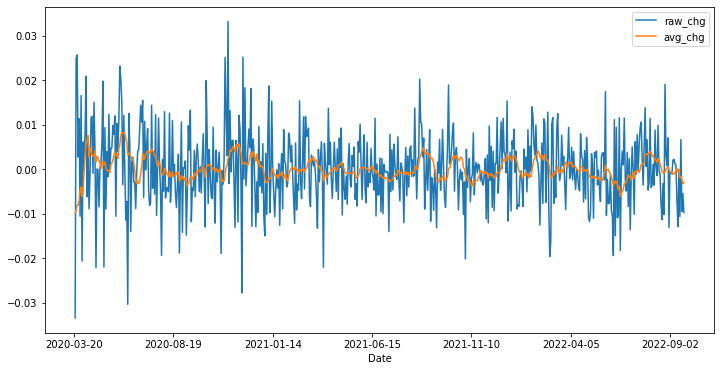

In [113]:
df1[['raw_chg','avg_chg']].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

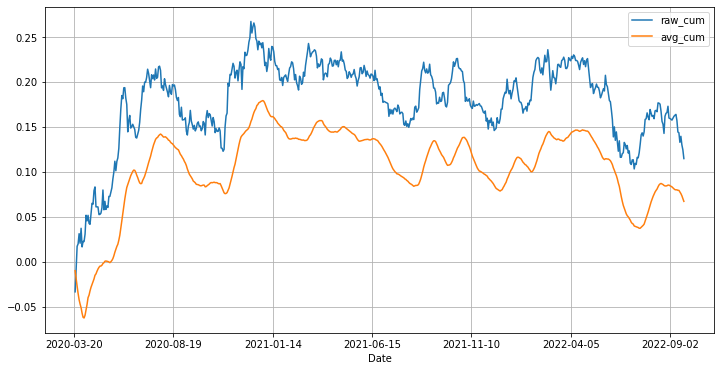

In [114]:
df1['raw_cum'] = df1['raw_chg'].cumsum()
df1['avg_cum'] = df1['avg_chg'].cumsum()
df1[['raw_cum','avg_cum']].plot(figsize=(12,6),grid=True)

<AxesSubplot:xlabel='Date'>

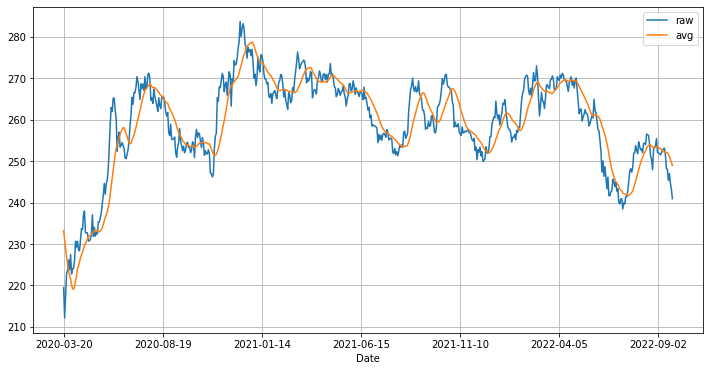

In [115]:
df1[['raw','avg']].plot(figsize=(12,6),grid=True)

<AxesSubplot:xlabel='Date'>

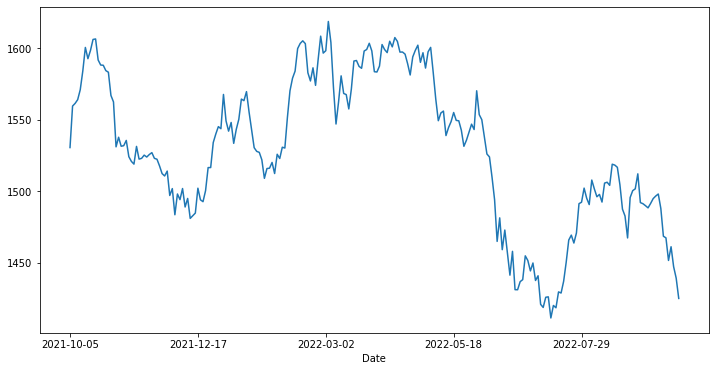

In [116]:
df['^KLSE'].loc['2021-10-05':].plot(figsize=(12,6))

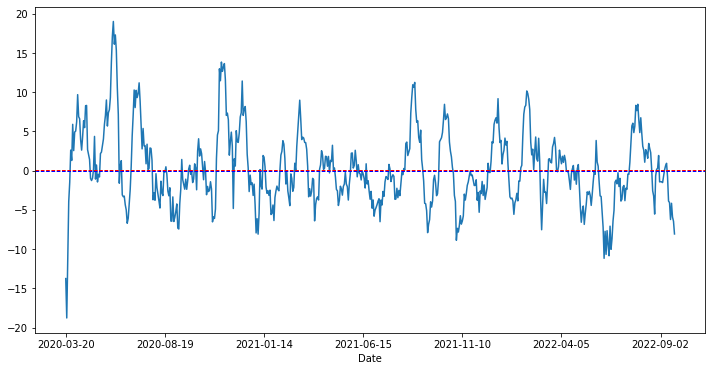

In [117]:
df1['Buy'] = df1.raw-df1.avg 
ax = df1['Buy'].plot(figsize=(12,6))
ax.axhline(y=0.05,color='r', linestyle='--', lw=1)
ax.axhline(y=0.025,color='b', linestyle='--', lw=1)

In [118]:
df1[['raw','avg','Buy']].tail(20)

raw       avg     Buy
Date                                  
2022-08-25  252.6446  253.2996 -0.6550
2022-08-26  253.4599  253.2896  0.1703
2022-08-29  253.6718  253.3549  0.3170
2022-08-30  255.4563  253.5210  1.9353
2022-09-01  252.1002  253.5242 -1.4240
2022-09-02  251.9736  253.3714 -1.3978
2022-09-05  251.7825  253.1980 -1.4155
2022-09-06  251.5198  253.0319 -1.5121
2022-09-07  252.0290  252.7328 -0.7038
2022-09-08  252.5886  252.4774  0.1112
2022-09-09  252.8877  252.2597  0.6280
2022-09-12  253.1334  252.1919  0.9416
2022-09-13  251.4295  252.2029 -0.7734
2022-09-14  248.1835  252.0511 -3.8676
2022-09-15  247.9967  252.0571 -4.0605
2022-09-19  245.3543  251.5711 -6.2168
2022-09-20  246.9864  251.1395 -4.1531
2022-09-21  244.6342  250.5370 -5.9028
2022-09-22  243.2884  249.7258 -6.4375
2022-09-23  240.9189  248.9804 -8.0616

In [119]:
df1['Buy'].loc[df1.Buy>0].describe()

count    285.0000
mean       4.2064
std        3.6531
min        0.0489
25%        1.3176
50%        3.2702
75%        6.4465
max       19.0166
Name: Buy, dtype: float64

In [120]:
df1['Buy'].loc[df1.Buy<0].describe()

count    330.0000
mean      -3.1918
std        2.4891
min      -18.7665
25%       -4.3003
50%       -2.6779
75%       -1.3858
max       -0.0341
Name: Buy, dtype: float64

In [121]:
profit = (df1['raw'].iloc[-1]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
print('% profit: ',profit*100)

% profit:  9.769066310244623


In [122]:
((profit*100)/df1.shape[0])*252

4.002934488100236

In [207]:
# profit = (df1['raw'].iloc[252]-df1['raw'].iloc[0])/df1['raw'].iloc[0]
# print('% profit: ',profit*100)

In [208]:
cap = 20000
w1 = [val * cap for val in w]
w1

[3456.0, 5242.0, 6506.0, 4792.0]

In [209]:
df1.iloc[-1,:l]

7222.KL     4.99
3158.KL     3.98
2089.KL    14.58
5209.KL     3.53
Name: 2022-09-15, dtype: float64

In [210]:
w1/df1.iloc[-1,:l]

7222.KL     692.5852
3158.KL    1317.0854
2089.KL     446.2277
5209.KL    1357.5071
Name: 2022-09-15, dtype: float64

### Max Draw Down

In [123]:
Roll_Max = df1['raw'].cummax()
Daily_Drawdown =  df1['raw']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Raw Max DD: ',Max_Daily_Drawdown)

Raw Max DD:  Date
2020-03-20    0.0000
2020-03-23   -0.0335
2020-03-24   -0.0335
2020-03-25   -0.0335
2020-03-26   -0.0335
               ...  
2022-09-19   -0.1595
2022-09-20   -0.1595
2022-09-21   -0.1595
2022-09-22   -0.1595
2022-09-23   -0.1595
Name: raw, Length: 615, dtype: float64


In [124]:
Roll_Max = df1['avg'].cummax()
Daily_Drawdown =  df1['avg']/Roll_Max - 1.0
Max_Daily_Drawdown = Daily_Drawdown.cummin()
print('Avg Max DD: ',Max_Daily_Drawdown)

Avg Max DD:  Date
2020-03-20    0.0000
2020-03-23   -0.0100
2020-03-24   -0.0190
2020-03-25   -0.0270
2020-03-26   -0.0349
               ...  
2022-09-19   -0.1330
2022-09-20   -0.1330
2022-09-21   -0.1330
2022-09-22   -0.1330
2022-09-23   -0.1330
Name: avg, Length: 615, dtype: float64


In [125]:
df1['Cumulative'] = df1.raw_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['raw_dd'] = df1['Cumulative'] - df1['HighValue']

df1['Cumulative'] = df1.avg_chg.cumsum().round(2)
df1['HighValue'] = df1['Cumulative'].cummax()
df1['avg_dd'] = df1['Cumulative'] - df1['HighValue']

<AxesSubplot:xlabel='Date'>

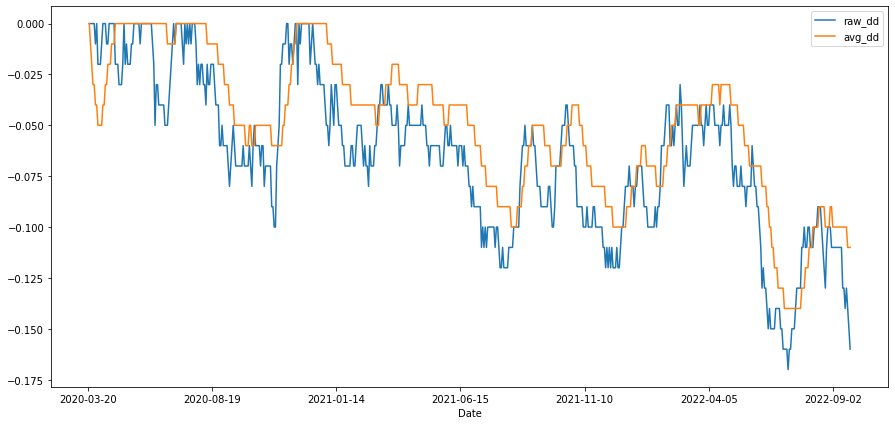

In [126]:
df1[['raw_dd','avg_dd']].plot(figsize=(15,7))

In [137]:
df1['shifted_price'] = df1.raw.shift()

In [138]:
cond = [df1.raw - df1.avg > 0.119, df1.raw - df1.avg < -0.103]
choices = ['Buy','Sell']
df1['Signal'] = np.select(cond,choices)

In [139]:
df1['Signal'].value_counts()

Sell    235
Name: Signal, dtype: int64

In [140]:
df1.Signal = df1.Signal.shift() # shift 1 day forward so buy today after getting signal yesterday

In [141]:
#https://klse.i3investor.com/web/hti/brokers
fees = 0.004
position = False
buydates,selldates = [],[]
buyprices,sellprices = [],[]
for index,row in df1.iterrows():
    if not position and row['Signal'] == 'Buy':
        buydates.append(index)
        buyprice1 = row.raw + (row.raw*fees)
        #buyprice1 = row.shifted_price + (row.shifted_price*fees)
        print('Buy ',buyprice1)
         #print(buyprices)
        #buyprices.append(row.raw)
        buyprices.append(buyprice1)
        position = True
        
    if position:
        if row['Signal'] == 'Sell' or row.shifted_price < 0.5 * buyprices[-1]:
            selldates.append(index)
            sellprice1 = row.raw - (row.raw*fees)
            #sellprice1 = row.shifted_price - (row.shifted_price*fees)
            print('Sell ',sellprice1)
            sellprices.append(sellprice1)
            position = False
        

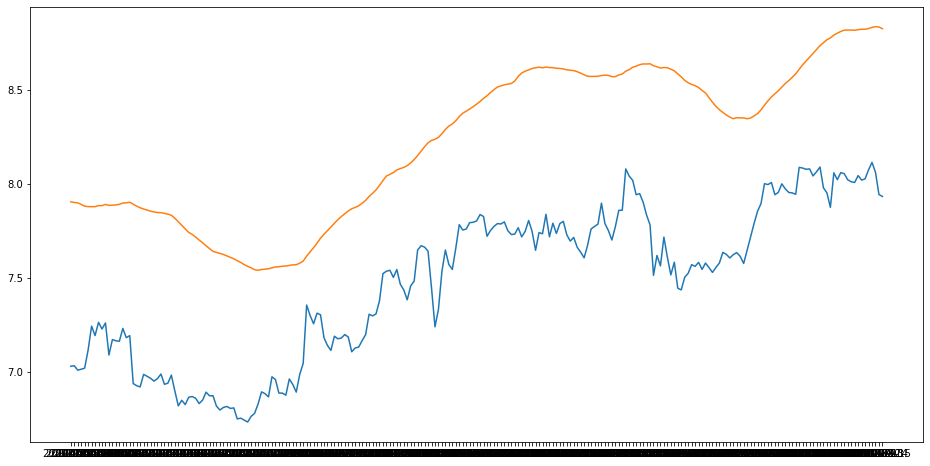

In [142]:
plt.figure(figsize=(16,8))
plt.plot(df1.raw)
plt.plot(df1.avg)

plt.scatter(df1.loc[buydates].index,df1.loc[buydates].raw,marker='^',color='g')
plt.scatter(df1.loc[selldates].index,df1.loc[selldates].raw,marker='>',color='r')

In [143]:
pd.DataFrame(sellprices,buyprices)

Empty DataFrame
Columns: []
Index: []

In [144]:
buyprices

[]

In [145]:
(pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod()

<ipython-input-145-4ed39ea291e2>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  (pd.Series([(sell-buy)/buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod()


1.0